# Определение возраста покупателей

## Исследовательский анализ данных

In [1]:
# < Перенесите сюда исследовательский анализ данных >
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
iris = datasets.load_iris()
from PIL import Image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications.resnet import ResNet50


Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:

    Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
    Контролировать добросовестность кассиров при продаже алкоголя.

Постройте модель, которая по фотографии определит приблизительный возраст человека. В вашем распоряжении набор фотографий людей с указанием возраста.

Данные взяты с сайта ChaLearn Looking at People. Они находятся в папке /datasets/faces/.
В вашем распоряжении одна папка со всеми изображениями (/final_files) и csv-файл labels.csv с двумя колонками: file_name и real_age.
Извлечь данные из папки вам поможет новый метод ImageDataGenerator —flow_from_dataframe(dataframe, directory, ...).

In [2]:
labels = pd.read_csv('D://Игорь/projects/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='D://Игорь/projects/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


In [3]:
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [4]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


В датасете 7591 строк, 2 столбца (имя файла, возраст)
Пропуски отсутствуют.

<AxesSubplot:xlabel='file_name', ylabel='real_age'>

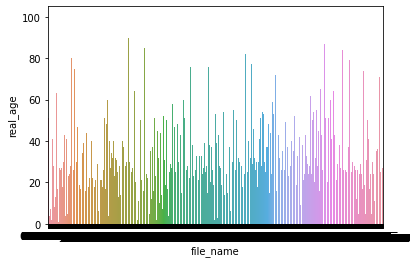

In [5]:
sns.barplot(x='file_name', y='real_age', data=labels)

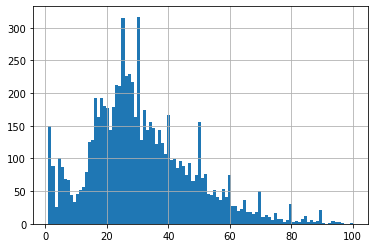

In [6]:
h = labels['real_age'].hist(bins=100)
fig = h.get_figure()

На гистограмме видно что больше всего людей возрастом от 16 до 45 лет, при этом самое большое кол-во людей возрастом 25 лет

Привет, я нек нашел как вывести сразу 15 картинок на экран, подскажи пожалуйста?

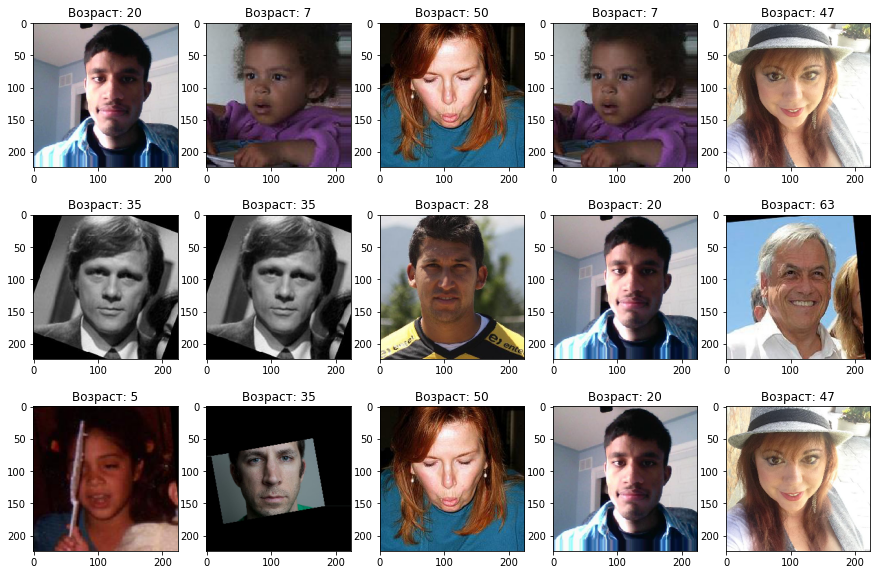

In [10]:
features, target = next(train_gen_flow)
fig,ax = plt.subplots(3,5,figsize = (15,10))
ax = ax.ravel()
for i in range(15):
    rand = np.random.randint(len(features))
    image = features[rand]
    ax[i].imshow(image)
    ax[i].set_title('Возраст: {}'.format(target[rand]))

plt.show()

Выбрав 15 фотографий можно сделатиь вывод что фотографии корректны, коррекции и изменения не нужны. имеются как чб так и цветные фото

### Вывод:
1. В датасете 7591 строк, 2 столбца (имя файла, возраст) Пропуски отсутствуют.
2. больше всего людей возрастом от 16 до 45 лет, при этом самое большое кол-во людей возрастом 25 лет
3. Выбрав 15 фотографий можно сделатиь вывод что фотографии корректны, коррекции и изменения не нужны. имеются как чб так и цветные фото, так же имеются фотографии разного размера.

## Обучение модели

```python

# < скопируйте код сюда >
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense,Conv2D, Flatten, AvgPool2D, AveragePooling2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.applications.resnet import ResNet50
 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
iris = datasets.load_iris()
from PIL import Image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications.resnet import ResNet50
 
 
 
optimizer = Adam(lr=0.0001)
 
 
def load_train(path):
 
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)
    train_gen_flow = train_datagen.flow_from_dataframe(
            dataframe=labels,
            directory=path + '/final_files',
            x_col='file_name',
            y_col='real_age',
            target_size=(224, 224),
            batch_size=32,
            class_mode='raw',
            subset='training',
            seed=12345)   
    return train_gen_flow
 
 
 
 
def load_test(path):
 
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)
    val_datagen_flow = train_datagen.flow_from_dataframe(
            dataframe=labels,
            directory=path + '/final_files',
            x_col='file_name',
            y_col='real_age',
            target_size=(224, 224),
            batch_size=32,
            class_mode='raw',
            subset='validation',
            seed=12345)      
    return val_datagen_flow
 
 
 
def create_model(input_shape):
    backbone = ResNet50(input_shape=(input_shape),
                    weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',     
                    include_top=False)
 
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer=optimizer, loss='mean_squared_error',
                  metrics=['mae'])
    return model
 
 
def train_model(model, train_data, test_data, batch_size=None, epochs=5,
               steps_per_epoch=None, validation_steps=None):
 
    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)
 
    return model 

```

```

# < скопируйте результат вывода на экран сюда >
178/178 - 44s - loss: 229.3757 - mae: 10.8041 - val_loss: 892.9239 - val_mae: 25.0357
Epoch 2/5
178/178 - 37s - loss: 61.2680 - mae: 5.9064 - val_loss: 791.4869 - val_mae: 23.0320
Epoch 3/5
178/178 - 37s - loss: 30.4285 - mae: 4.2519 - val_loss: 212.7427 - val_mae: 11.2104
Epoch 4/5
178/178 - 37s - loss: 19.5745 - mae: 3.4190 - val_loss: 119.4341 - val_mae: 8.4039
Epoch 5/5
178/178 - 36s - loss: 14.6283 - mae: 2.9508 - val_loss: 76.9603 - val_mae: 6.7542
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 9s - loss: 76.9603 - mae: 6.7542
Test MAE: 6.7542
# < длинные строки со скачиванием модели можно удалить >

```

## Анализ обученной модели

Тестовое MAE  показало отличный результат в 6.7542, с 5ю эпохами, если делать меньше эпох то скорость обработки будет лучше но порог в 8 не преодалеть. Использован оптимайзер Адам с learning rate 0.0001.
